In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
base_dir = '/nas/vhluong/Result/Orion_333/debug_GordonHCP/version_17'
version = 'version_17'
train_folder = os.path.join(base_dir, version, 'train_performance')
test_folder = os.path.join(base_dir, version, 'test_performance')
print(train_folder)
print(test_folder)

/nas/vhluong/Result/Orion_333/debug_GordonHCP/version_17/version_17/train_performance
/nas/vhluong/Result/Orion_333/debug_GordonHCP/version_17/version_17/test_performance


In [10]:
batch_num = 1
orig = np.load(test_folder + '/orig_batch_'+str(batch_num)+'.npy')[:, :200, :]
pred = np.load(test_folder+'/pred_batch_'+str(batch_num)+'.npy')[:, :200, :]
# mask = np.load(test_folder+'/mask_batch_'+str(batch_num)+'.npy')
print("Original:", orig.shape)
print("Prediction:", pred.shape)
# print("Mask:", mask.shape)

Original: (8, 200, 333)
Prediction: (8, 200, 333)


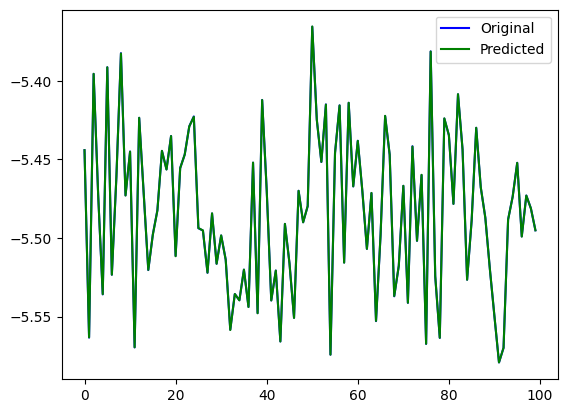

In [13]:
sample_num = 5
channel_num = 10
plt.plot(orig[sample_num, :100, channel_num], color='blue', label='Original')
plt.plot(pred[sample_num, :100, channel_num], color='green', label='Predicted')
plt.legend()
plt.show()

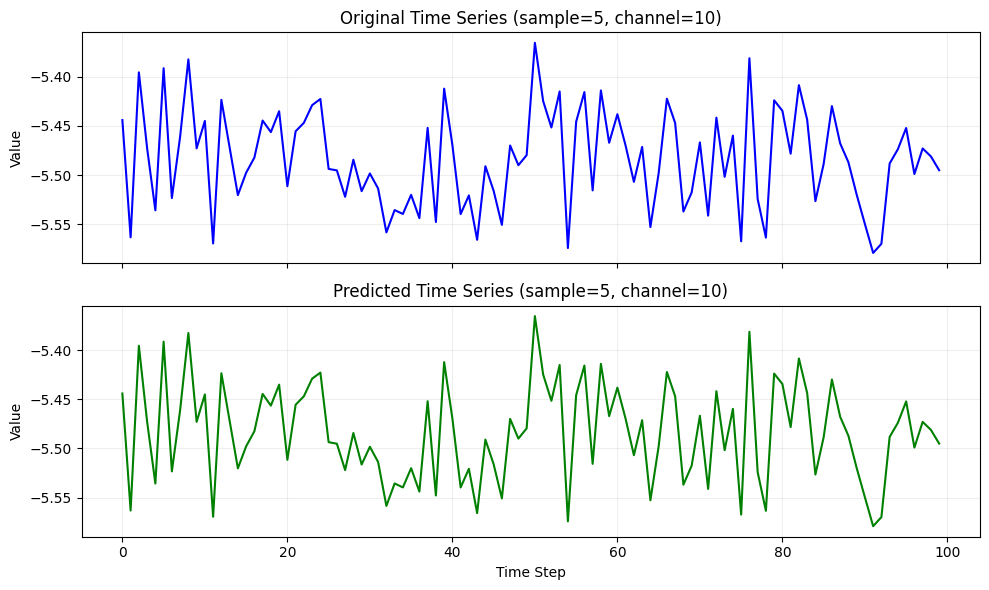

In [14]:
sample_num = 5
channel_num = 10
t = np.arange(100)

orig_series = orig[sample_num, :100, channel_num]
pred_series = pred[sample_num, :100, channel_num]

fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axes[0].plot(t, orig_series, color='blue')
axes[0].set_title(f'Original Time Series (sample={sample_num}, channel={channel_num})')
axes[0].set_ylabel('Value')
axes[0].grid(alpha=0.2)

axes[1].plot(t, pred_series, color='green')
axes[1].set_title(f'Predicted Time Series (sample={sample_num}, channel={channel_num})')
axes[1].set_xlabel('Time Step')
axes[1].set_ylabel('Value')
axes[1].grid(alpha=0.2)

plt.tight_layout()
plt.show()


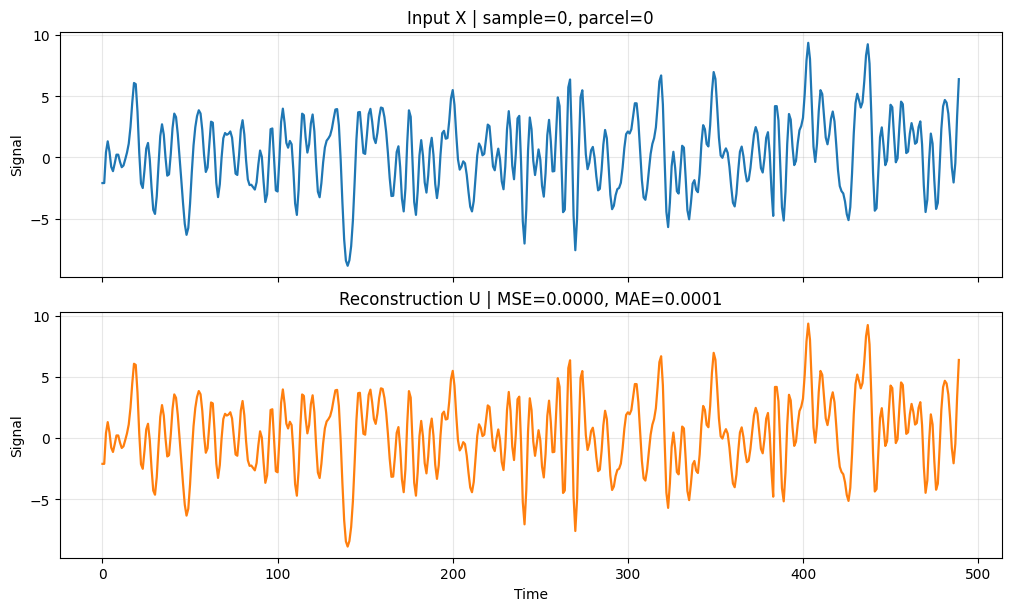

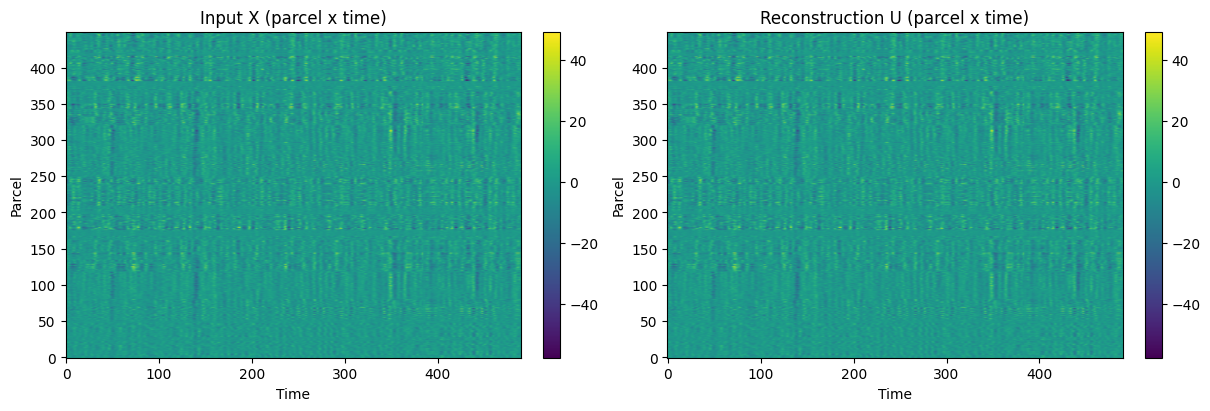

In [4]:
import glob
import numpy as np
import os
import matplotlib.pyplot as plt


# Folder created by demo_data_classification.py
recon_dir = "/home/vhluong/MnemoDyn_Draft/coe/light/Result/HBN_Sex_Classification_450_10_Times/Results/11/reconstruction_outputs_ds005747"

# Pick one matching pair (same epoch/batch)
u_path = sorted(glob.glob(os.path.join(recon_dir, "*_U_recon.npy")))[20]
x_path = u_path.replace("_U_recon.npy", "_x_input.npy")

U = np.load(u_path)  # [B, T, D]
X = np.load(x_path)  # [B, T, D]

sample_idx = 0
parcel_idx = 0

u_ts = U[sample_idx, :, parcel_idx]
x_ts = X[sample_idx, :, parcel_idx]

mse = np.mean((u_ts - x_ts) ** 2)
mae = np.mean(np.abs(u_ts - x_ts))

mse = np.mean((u_ts - x_ts) ** 2)
mae = np.mean(np.abs(u_ts - x_ts))

fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True, constrained_layout=True)

axes[0].plot(x_ts, color="tab:blue", linewidth=1.6)
axes[0].set_title(f"Input X | sample={sample_idx}, parcel={parcel_idx}")
axes[0].set_ylabel("Signal")
axes[0].grid(alpha=0.3)

axes[1].plot(u_ts, color="tab:orange", linewidth=1.6)
axes[1].set_title(f"Reconstruction U | MSE={mse:.4f}, MAE={mae:.4f}")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Signal")
axes[1].grid(alpha=0.3)

# Optional: heatmap comparison for one sample
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
im0 = axes[0].imshow(X[sample_idx].T, aspect="auto", origin="lower", cmap="viridis")
axes[0].set_title("Input X (parcel x time)")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Parcel")
plt.colorbar(im0, ax=axes[0], fraction=0.046)

im1 = axes[1].imshow(U[sample_idx].T, aspect="auto", origin="lower", cmap="viridis")
axes[1].set_title("Reconstruction U (parcel x time)")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Parcel")
plt.colorbar(im1, ax=axes[1], fraction=0.046)

plt.show()